In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import plotly.express as px
import seaborn as sns

In [2]:
connection_string = f'ympsazqytxgdyd:84f61aeda6880d7b357752a62d790ff878b9b80328a5e86c9436dae6fda1439f@ec2-54-152-185-191.compute-1.amazonaws.com:5432/d9pes28e80ohoe'
engine = create_engine(f'postgresql://{connection_string}')
engine.table_names()

<ipython-input-2-82faad89ee58>:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['merged3',
 'datecolumnstr',
 'mergedcovid2',
 'covidupdated',
 'schoolclosuresupdated',
 'finaltable',
 'covid_schools',
 'schools',
 'final']

In [3]:
covid_table = pd.read_sql('SELECT * FROM final', con=engine)

#covid_table
covid_table.to_csv("covid_Table.csv", index=False)

In [4]:
covid_table["date"] =\
pd.to_datetime(covid_table["date_"])
covid_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81837 entries, 0 to 81836
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   iso_code                            81837 non-null  object        
 1   continent                           81837 non-null  object        
 2   location                            81837 non-null  object        
 3   total_cases                         80701 non-null  float64       
 4   new_cases                           80693 non-null  float64       
 5   total_deaths                        73413 non-null  float64       
 6   new_deaths                          73412 non-null  float64       
 7   total_cases_per_million             80701 non-null  float64       
 8   new_cases_per_million               80693 non-null  float64       
 9   total_deaths_per_million            73413 non-null  float64       
 10  new_deaths_per_million

In [5]:
covid_table.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'hosp_patients', 'hosp_patients_per_million',
       'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
       'new_tests', 'total_tests', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'positive_rate', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'school_closures', 'date_', 'day_num',
       'date'],
      dtype='object'

In [6]:
covid_table = covid_table[['iso_code',
'continent',
'location',
'date_',
'new_cases_per_million',
'new_deaths_per_million', 
#'hosp_patients_per_million',# no tiene ningún valor para los países seleccionados
'new_tests_per_thousand',
'positive_rate', 
'people_vaccinated',
'population',
'population_density',
'median_age',
'gdp_per_capita',
'hospital_beds_per_thousand',
'life_expectancy',
'day_num',
'school_closures',
'date']]
covid_table

,iso_code,continent,location,date_,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,day_num,school_closures,date
0,ABW,North America,Aruba,03/29/2021,NaN,NaN,NaN,NaN,15600.0,0.106766,584.800,41.2,35973.781,NaN,76.29,1,3,2021-03-29
1,ABW,North America,Aruba,03/30/2021,NaN,NaN,NaN,NaN,NaN,0.106766,584.800,41.2,35973.781,NaN,76.29,2,3,2021-03-30
2,ABW,North America,Aruba,03/31/2021,NaN,NaN,NaN,NaN,NaN,0.106766,584.800,41.2,35973.781,NaN,76.29,3,3,2021-03-31
3,ABW,North America,Aruba,04/01/2021,NaN,NaN,NaN,NaN,NaN,0.106766,584.800,41.2,35973.781,NaN,76.29,4,3,2021-04-01
4,ABW,North America,Aruba,04/02/2021,NaN,NaN,NaN,NaN,NaN,0.106766,584.800,41.2,35973.781,NaN,76.29,5,3,2021-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81832,ZWE,Africa,Zimbabwe,06/09/2021,7.468,0.336,0.231,0.026,689920.0,14.862927,42.729,19.6,1899.775,1.7,61.49,447,0,2021-06-09
81833,ZWE,Africa,Zimbabwe,06/10/2021,4.306,0.269,0.191,0.024,690452.0,14.862927,42.729,19.6,1899.775,1.7,61.49,448,0,2021-06-10
81834,ZWE,Africa,Zimbabwe,06/11/2021,12.918,0.202,0.177,0.032,691251.0,14.862927,42.729,19.6,1899.775,1.7,61.49,449,0,2021-06-11
81835,ZWE,Africa,Zimbabwe,06/12/2021,11.034,0.202,0.177,0.039,692180.0,14.862927,42.729,19.6,1899.775,1.7,61.49,450,0,2021-06-12


In [7]:
covid_table["location"].values

array(['Aruba', 'Aruba', 'Aruba', ..., 'Zimbabwe', 'Zimbabwe', 'Zimbabwe'],
      dtype=object)

In [8]:
covid_table.to_csv

<bound method NDFrame.to_csv of       iso_code      continent  location       date_  new_cases_per_million  \
0          ABW  North America     Aruba  03/29/2021                    NaN   
1          ABW  North America     Aruba  03/30/2021                    NaN   
2          ABW  North America     Aruba  03/31/2021                    NaN   
3          ABW  North America     Aruba  04/01/2021                    NaN   
4          ABW  North America     Aruba  04/02/2021                    NaN   
...        ...            ...       ...         ...                    ...   
81832      ZWE         Africa  Zimbabwe  06/09/2021                  7.468   
81833      ZWE         Africa  Zimbabwe  06/10/2021                  4.306   
81834      ZWE         Africa  Zimbabwe  06/11/2021                 12.918   
81835      ZWE         Africa  Zimbabwe  06/12/2021                 11.034   
81836      ZWE         Africa  Zimbabwe  06/13/2021                  7.199   

       new_deaths_per_million  

In [9]:
g5_data = covid_table[covid_table['location'].isin(['France', 'Germany', 'Spain', 'Sweden', 'Italy'])]
g5_data

,iso_code,continent,location,date_,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,day_num,school_closures,date
19367,DEU,Europe,Germany,01/24/2020,NaN,NaN,NaN,NaN,NaN,83.783945,237.016,46.6,45229.245,8.00,81.33,1,0,2020-01-24
19368,DEU,Europe,Germany,01/27/2020,0.012,NaN,NaN,NaN,NaN,83.783945,237.016,46.6,45229.245,8.00,81.33,2,0,2020-01-27
19369,DEU,Europe,Germany,01/28/2020,0.036,NaN,NaN,NaN,NaN,83.783945,237.016,46.6,45229.245,8.00,81.33,3,0,2020-01-28
19370,DEU,Europe,Germany,01/29/2020,0.000,NaN,NaN,NaN,NaN,83.783945,237.016,46.6,45229.245,8.00,81.33,4,0,2020-01-29
19371,DEU,Europe,Germany,01/30/2020,0.000,NaN,NaN,NaN,NaN,83.783945,237.016,46.6,45229.245,8.00,81.33,5,0,2020-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70450,SWE,Europe,Sweden,06/14/2021,0.000,0.0,NaN,NaN,NaN,10.099270,24.718,41.0,46949.283,2.22,82.80,500,0,2021-06-14
70451,SWE,Europe,Sweden,06/15/2021,116.840,0.0,NaN,NaN,4201394.0,10.099270,24.718,41.0,46949.283,2.22,82.80,501,0,2021-06-15
70452,SWE,Europe,Sweden,06/16/2021,0.000,0.0,NaN,NaN,4243415.0,10.099270,24.718,41.0,46949.283,2.22,82.80,502,0,2021-06-16
70453,SWE,Europe,Sweden,06/17/2021,0.000,0.0,NaN,NaN,4290143.0,10.099270,24.718,41.0,46949.283,2.22,82.80,503,0,2021-06-17


In [10]:
g5_data = g5_data.sort_values(["location", "date"], ascending=True)
g5_data

,iso_code,continent,location,date_,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,day_num,school_closures,date
26078,FRA,Europe,France,01/24/2020,0.030,NaN,NaN,NaN,NaN,67.564251,122.578,42.0,38605.671,5.98,82.66,1,0,2020-01-24
26079,FRA,Europe,France,01/25/2020,0.015,NaN,NaN,NaN,NaN,67.564251,122.578,42.0,38605.671,5.98,82.66,2,0,2020-01-25
26080,FRA,Europe,France,01/26/2020,0.000,NaN,NaN,NaN,NaN,67.564251,122.578,42.0,38605.671,5.98,82.66,3,0,2020-01-26
26081,FRA,Europe,France,01/27/2020,0.000,NaN,NaN,NaN,NaN,67.564251,122.578,42.0,38605.671,5.98,82.66,4,0,2020-01-27
26082,FRA,Europe,France,01/28/2020,0.015,NaN,NaN,NaN,NaN,67.564251,122.578,42.0,38605.671,5.98,82.66,5,0,2020-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70450,SWE,Europe,Sweden,06/14/2021,0.000,0.0,NaN,NaN,NaN,10.099270,24.718,41.0,46949.283,2.22,82.80,500,0,2021-06-14
70451,SWE,Europe,Sweden,06/15/2021,116.840,0.0,NaN,NaN,4201394.0,10.099270,24.718,41.0,46949.283,2.22,82.80,501,0,2021-06-15
70452,SWE,Europe,Sweden,06/16/2021,0.000,0.0,NaN,NaN,4243415.0,10.099270,24.718,41.0,46949.283,2.22,82.80,502,0,2021-06-16
70453,SWE,Europe,Sweden,06/17/2021,0.000,0.0,NaN,NaN,4290143.0,10.099270,24.718,41.0,46949.283,2.22,82.80,503,0,2021-06-17


In [11]:
g5_data['location'].unique()

array(['France', 'Germany', 'Italy', 'Spain', 'Sweden'], dtype=object)

In [12]:
g5_data.to_csv('g5_data.csv',index=False)

In [64]:
g5_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 26078 to 70454
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    2535 non-null   object        
 1   continent                   2535 non-null   object        
 2   location                    2535 non-null   object        
 3   date_                       2535 non-null   object        
 4   new_cases_per_million       2533 non-null   float64       
 5   new_deaths_per_million      2380 non-null   float64       
 6   new_tests_per_thousand      1213 non-null   float64       
 7   positive_rate               1671 non-null   float64       
 8   people_vaccinated           667 non-null    float64       
 9   population                  2535 non-null   float64       
 10  population_density          2535 non-null   float64       
 11  median_age                  2535 non-null   float64

In [297]:
g5_data_cl = g5_data.fillna(g5_data.median())
g5_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 26078 to 70454
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   iso_code                    2535 non-null   object        
 1   continent                   2535 non-null   object        
 2   location                    2535 non-null   object        
 3   date_                       2535 non-null   object        
 4   new_cases_per_million       2535 non-null   float64       
 5   new_deaths_per_million      2535 non-null   float64       
 6   new_tests_per_thousand      2535 non-null   float64       
 7   positive_rate               2535 non-null   float64       
 8   people_vaccinated           2535 non-null   float64       
 9   population                  2535 non-null   float64       
 10  population_density          2535 non-null   float64       
 11  median_age                  2535 non-null   float64

<ipython-input-297-854b6a9d9ee2>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [298]:
d

NameError: name 'd' is not defined

### Plotting new deaths per million

In [299]:
fig = px.line(g5_data, x ="date", y="new_deaths_per_million", color="iso_code" )
fig_c = px.line(g5_data_cl, x ="date", y="new_deaths_per_million", color="iso_code" )
fig_c.show()
fig.show()

### Plotting school closures state

In [300]:
fig = px.line(g5_data, x ="date", y="school_closures", color="iso_code" )
fig_c = px.line(g5_data_cl, x ="date", y="school_closures", color="iso_code" )
fig_c.show()
fig.show()

# Starting the analysis

In [320]:
#Importing Dependencies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf

In [321]:
#Sorting values from oldest to newest in order to have a proper windowed reading

g5_data_cl = g5_data_cl.sort_values(["date"], ascending=True)
#g5_data_cl = g5_data_cl[g5_data_cl["iso_code"]=="FRA"]
g5_data_cl

,iso_code,continent,location,date_,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,day_num,school_closures,date
26078,FRA,Europe,France,01/24/2020,0.030,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,1,0,2020-01-24
19367,DEU,Europe,Germany,01/24/2020,50.395,1.640,2.821,0.061,5890888.0,83.783945,237.016,46.6,45229.245,8.00,81.33,1,0,2020-01-24
26079,FRA,Europe,France,01/25/2020,0.015,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,2,0,2020-01-25
26080,FRA,Europe,France,01/26/2020,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,3,0,2020-01-26
26081,FRA,Europe,France,01/27/2020,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,4,0,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37249,ITA,Europe,Italy,06/18/2021,18.971,0.579,2.821,0.061,30913333.0,60.461828,205.859,47.9,35220.084,3.18,83.51,505,1,2021-06-18
24109,ESP,Europe,Spain,06/18/2021,90.130,0.385,2.821,0.061,5890888.0,46.754783,93.105,45.5,34272.360,2.97,83.56,504,1,2021-06-18
19876,DEU,Europe,Germany,06/18/2021,11.136,1.158,2.821,0.061,42065100.0,83.783945,237.016,46.6,45229.245,8.00,81.33,510,1,2021-06-18
26589,FRA,Europe,France,06/18/2021,47.170,1.006,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,512,1,2021-06-18


In [322]:
# Plotting current data to see trends and status
fig_c = px.line(g5_data_cl, x ="date", y="new_cases_per_million", color="iso_code" )
fig_c.show()

## Shaping the data

In [323]:
# Here we are droping all labels and dates so we can work with just the values we will use to train the model
g5_data_prepared = g5_data_cl.drop(["continent","location","iso_code","date_", "date", "day_num"], axis=1)

# Separating the Date column
date_range = g5_data_cl["date"]


In [324]:
g5_data_prepared

,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
26078,0.030,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
19367,50.395,1.640,2.821,0.061,5890888.0,83.783945,237.016,46.6,45229.245,8.00,81.33,0
26079,0.015,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
26080,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
26081,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37249,18.971,0.579,2.821,0.061,30913333.0,60.461828,205.859,47.9,35220.084,3.18,83.51,1
24109,90.130,0.385,2.821,0.061,5890888.0,46.754783,93.105,45.5,34272.360,2.97,83.56,1
19876,11.136,1.158,2.821,0.061,42065100.0,83.783945,237.016,46.6,45229.245,8.00,81.33,1
26589,47.170,1.006,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,1


In [325]:
# In this step we are scaling the whole data, so far we haven't splitted it yet. Also, we haven't defined X and y
# It is important to highlight that swhen doing the inverse_transform we need to use data with the same number of columns
# than the original one which is 12 for this case

scaler = MinMaxScaler(feature_range=(0, 1))
g5_scaled = scaler.fit_transform(g5_data_prepared)
print(f'Number of samples: {len(g5_scaled)}')
print(f'The number of columns we need to return after transforming the data is: {g5_data_prepared.shape[1]}, which is the number of features')

Number of samples: 2535
The number of columns we need to return after transforming the data is: 12, which is the number of features


In [308]:
g5_scaled
print(g5_scaled.shape)
print(g5_scaled)

(2535, 12)
[[0.330824   0.48504383 0.30656128 ... 0.65051903 0.59641256 0.        ]
 [0.34130204 0.48504383 0.30656128 ... 1.         0.         0.        ]
 [0.33082088 0.48504383 0.30656128 ... 0.65051903 0.59641256 0.        ]
 ...
 [0.33476453 0.47298112 0.30656128 ... 0.16608997 0.97757848 0.33333333]
 [0.3495686  0.47077549 0.30656128 ... 0.12975779 1.         0.33333333]
 [0.33081776 0.46639835 0.30656128 ... 0.         0.65919283 0.        ]]


In [333]:
# Creating a dataframe of the scaled values and comparing with the unscaled data frame
g5_scaled_df = pd.DataFrame(g5_scaled, columns = g5_data_prepared.columns.tolist())
print("Unscaled Dataframe")
display(g5_data_prepared)
print("Scaled Dataframe")
display(g5_scaled_df)

Unscaled Dataframe


,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
26078,0.030,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
19367,50.395,1.640,2.821,0.061,5890888.0,83.783945,237.016,46.6,45229.245,8.00,81.33,0
26079,0.015,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
26080,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
26081,0.000,1.640,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37249,18.971,0.579,2.821,0.061,30913333.0,60.461828,205.859,47.9,35220.084,3.18,83.51,1
24109,90.130,0.385,2.821,0.061,5890888.0,46.754783,93.105,45.5,34272.360,2.97,83.56,1
19876,11.136,1.158,2.821,0.061,42065100.0,83.783945,237.016,46.6,45229.245,8.00,81.33,1
26589,47.170,1.006,2.821,0.061,5890888.0,67.564251,122.578,42.0,38605.671,5.98,82.66,1


Scaled Dataframe


,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
0,0.330824,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.000000
1,0.341302,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.000000
2,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.000000
3,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.000000
4,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2530,0.334765,0.472981,0.306561,0.140187,0.734893,0.683488,0.853239,1.000000,0.074760,0.166090,0.977578,0.333333
2531,0.349569,0.470775,0.306561,0.140187,0.140042,0.497465,0.322127,0.652174,0.000000,0.129758,1.000000,0.333333
2532,0.333135,0.479564,0.306561,0.140187,1.000000,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.333333
2533,0.340631,0.477836,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.333333


In [335]:
#Creating the window function that will be moving through time to predict the next periods

trainX = []
trainY = []

future_d = 5   # This is the number of days we want the function to predict in the future
past_d = 30     # This is the number of past days we want to use to predict the future

for i in range(past_d, len(g5_scaled) - future_d +1):
    trainX.append(g5_scaled[i - past_d:i, 0:g5_scaled.shape[1]])
    trainY.append(g5_scaled[i + future_d - 1:i + future_d, 11])

trainX, trainY = np.array(trainX), np.array(trainY)

In [359]:
# Here is an example on how the window moves on each dataframe, so each time a new df is generated it includes the
# new date and exclude the oldest date

x = 0
for array in trainX[:3]:
    x+=1
    print(f'Dataframe number {x}')
    dataframe = pd.DataFrame(array[0:10], columns = g5_data_prepared.columns.tolist())
    display(dataframe)

Dataframe number 1


,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
0,0.330824,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
1,0.341302,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
2,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
3,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
4,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
5,0.330820,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
6,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
7,0.330825,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
8,0.330818,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
9,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0


Dataframe number 2


,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
0,0.341302,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
1,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
2,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
3,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
4,0.330820,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
5,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
6,0.330825,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
7,0.330818,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
8,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
9,0.330818,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0


Dataframe number 3


,new_cases_per_million,new_deaths_per_million,new_tests_per_thousand,positive_rate,people_vaccinated,population,population_density,median_age,gdp_per_capita,hospital_beds_per_thousand,life_expectancy,school_closures
0,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
1,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
2,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
3,0.330820,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
4,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
5,0.330825,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
6,0.330818,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
7,0.330821,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0
8,0.330818,0.485044,0.306561,0.140187,0.140042,1.000000,1.000000,0.811594,0.864317,1.000000,0.000000,0.0
9,0.330818,0.485044,0.306561,0.140187,0.140042,0.779877,0.460956,0.144928,0.341827,0.650519,0.596413,0.0


In [360]:
#trainX_df = pd.DataFrame(trainX, columns = g5_data_prepared.columns.tolist())
trainY_df = pd.DataFrame(trainY, columns = ['school_closures'])
trainY_df

,school_closures
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
2496,0.333333
2497,0.333333
2498,0.333333
2499,0.333333


In [311]:
print(trainX.shape)
print(trainY.shape)

(2501, 30, 12)
(2501, 1)


In [362]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=trainY.shape[1]))

In [363]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 30, 128)           72192     
_________________________________________________________________
lstm_15 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 123,713
Trainable params: 123,713
Non-trainable params: 0
_________________________________________________________________


In [364]:
# Compiling with Categorical_crossentropy
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Compiling with mean_squared_error
#model.compile(loss='mean_squared_error', 
#             optimizer='Adadelta',
#              metrics=['accuracy'])

In [365]:
model.fit(
    trainX,
    trainY,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
79/79 [==============================] - 2s 20ms/step - loss: 0.4923 - accuracy: 0.0672
Epoch 2/60
79/79 [==============================] - 2s 20ms/step - loss: 0.4503 - accuracy: 0.0672
Epoch 3/60
79/79 [==============================] - 2s 20ms/step - loss: 0.4090 - accuracy: 0.0672
Epoch 4/60
79/79 [==============================] - 2s 20ms/step - loss: 0.3690 - accuracy: 0.0672
Epoch 5/60
79/79 [==============================] - 2s 20ms/step - loss: 0.3300 - accuracy: 0.0672
Epoch 6/60
79/79 [==============================] - 2s 20ms/step - loss: 0.2922 - accuracy: 0.0672
Epoch 7/60
79/79 [==============================] - 2s 20ms/step - loss: 0.2569 - accuracy: 0.0672
Epoch 8/60
79/79 [==============================] - 2s 20ms/step - loss: 0.2259 - accuracy: 0.0672
Epoch 9/60
79/79 [==============================] - 2s 19ms/step - loss: 0.1992 - accuracy: 0.0672
Epoch 10/60
79/79 [==============================] - 2s 20ms/step - loss: 0.1759 - accuracy: 0.0672
Epoch 11/

In [366]:
future_d = 30
future_dates_p = pd.date_range(list(date_range)[-1], periods=future_d, freq='1d').tolist()

forecast = model.predict(trainX[-future_d:]) #forecasting the last 90 days 

In [368]:
print(forecast.shape)
print(g5_scaled.shape)
forecast_copies.ndim

(30, 1)
(2535, 12)


2

In [369]:
# In order to inverse transform we need to have the same number of columns we used to have when scaling which is 12
# here the forecast shape has just 1 column, that's why we will create other 11 copies of it to apply the proper transform

forecast_copies = np.repeat(forecast, g5_scaled.shape[1], axis=-1) # Here we duplicate the columns by the number of the original g5_scaled columns

# Here we are applying inverse_transform, however, from all the samples we will take just the first column.
# We don't really need the other columns since they are all repeated
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0] 

In [370]:
forecast_copies

array([[0.46726236, 0.46726236, 0.46726236, 0.46726236, 0.46726236,
        0.46726236, 0.46726236, 0.46726236, 0.46726236, 0.46726236,
        0.46726236, 0.46726236],
       [0.46383995, 0.46383995, 0.46383995, 0.46383995, 0.46383995,
        0.46383995, 0.46383995, 0.46383995, 0.46383995, 0.46383995,
        0.46383995, 0.46383995],
       [0.45884147, 0.45884147, 0.45884147, 0.45884147, 0.45884147,
        0.45884147, 0.45884147, 0.45884147, 0.45884147, 0.45884147,
        0.45884147, 0.45884147],
       [0.46203765, 0.46203765, 0.46203765, 0.46203765, 0.46203765,
        0.46203765, 0.46203765, 0.46203765, 0.46203765, 0.46203765,
        0.46203765, 0.46203765],
       [0.46158487, 0.46158487, 0.46158487, 0.46158487, 0.46158487,
        0.46158487, 0.46158487, 0.46158487, 0.46158487, 0.46158487,
        0.46158487, 0.46158487],
       [0.45879808, 0.45879808, 0.45879808, 0.45879808, 0.45879808,
        0.45879808, 0.45879808, 0.45879808, 0.45879808, 0.45879808,
        0.45879808,

In [371]:
y_pred_future

array([655.85046, 639.3999 , 615.37366, 630.73676, 628.56036, 615.16504,
       591.09326, 602.17474, 602.50836, 608.0949 , 617.743  , 617.09735,
       608.2955 , 596.28284, 594.0087 , 597.6678 , 603.90594, 603.78516,
       595.5769 , 588.9352 , 575.38257, 563.5575 , 565.3702 , 575.1574 ,
       581.9391 , 605.62067, 616.8656 , 606.87067, 595.08466, 591.9111 ],
      dtype=float32)

In [372]:
forecast_dates = []
for i in future_dates_p:
    x = i.date()
    forecast_dates.append(x)

In [373]:
forecast_dates
forecast_array = np.array(forecast_dates)
df_forecast = pd.DataFrame({'date':forecast_dates, 'school_closures':y_pred_future})

In [374]:
df_forecast

,date,school_closures
0,2021-06-18,655.850464
1,2021-06-19,639.399902
2,2021-06-20,615.373657
3,2021-06-21,630.736755
4,2021-06-22,628.560364
5,2021-06-23,615.165039
6,2021-06-24,591.093262
7,2021-06-25,602.174744
8,2021-06-26,602.508362
9,2021-06-27,608.094910


In [375]:
df_forecast['date']=pd.to_datetime(df_forecast['date'])

In [376]:
original = g5_data_cl[['date','school_closures']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2021-1-1']

<ipython-input-376-1892618d8d7f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [377]:
display(original)
display(df_forecast)

,date,school_closures
70286,2021-01-01,2
23941,2021-01-01,3
37081,2021-01-01,2
19708,2021-01-01,3
26421,2021-01-01,2
...,...,...
37249,2021-06-18,1
24109,2021-06-18,1
19876,2021-06-18,1
26589,2021-06-18,1


,date,school_closures
0,2021-06-18,655.850464
1,2021-06-19,639.399902
2,2021-06-20,615.373657
3,2021-06-21,630.736755
4,2021-06-22,628.560364
5,2021-06-23,615.165039
6,2021-06-24,591.093262
7,2021-06-25,602.174744
8,2021-06-26,602.508362
9,2021-06-27,608.094910


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='date', ylabel='school_closures'>

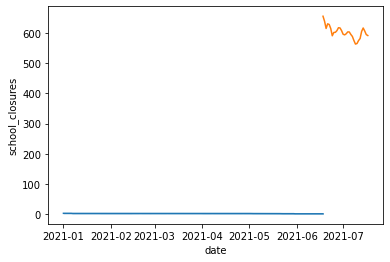

In [378]:
sns.lineplot(original['date'], original['school_closures'])
sns.lineplot(df_forecast['date'], df_forecast['school_closures'])